ЛАБОРАТОРНАЯ РАБОТА 8. ПОСТРОЕНИЕ ПАЙПЛАЙНА ОДНОМЕРНОЙ РЕГРЕССИИ

Цели и задачи

Цель лабораторной работы: разработка единого пайплайна для решения задачи регрессии.
Основные задачи:
–	реализовать каонвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии;
–	получение теоретических представлений о задаче регресии;
–	получение навыков использования пайплайна при решении задачи машинного обучения;
–	получение навыков рефакторинга кода в задачах машинного обучения.
  
Теоретическое обоснование

Для решения задачи одномерной регрессии необходимо использовать универсальный пайплайн предварительной обработки данных. К имеющемусяя шаблонному коду необходимо добавить код для обучения модели, интерпретации и визуализации результатов.
Линейная регрессия – метод восстановления зависимости между двумя переменными. Пусть задана модель регрессии – параметрическое семейство функций 𝑔(𝑥, 𝛼), где 𝛼 ∈ ℝ𝑝 – вектор параметров модели. Определим функционал качества аппроксимации целевой зависимости на выборке 𝑋ℓ как сумму квадратов ошибок:

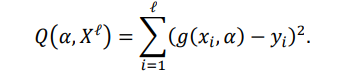

Обучение по методу наименьших квадратов (МНК) состоит в том, чтобы найти вектор параметров 𝛼∗, при котором достигается минимум среднего квадрата ошибки на заданной обучающей выборке 𝑋ℓ

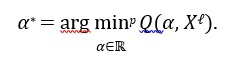

Стандартный способ решения этой оптимизационной задачи – воспользоваться необходимым условием минимума. Если функция 𝑔(𝑥, 𝛼) достаточное число раз дифференцируема по 𝛼, то в точке минимума выполняется система 𝑝 уравнений относительно 𝑝 неизвестных:

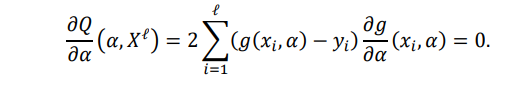

С использованием библиотек машинного обучения формулы (8.1) – (8.2) можно реализовать автоматически, но следует понимать, что конкретно реализует каждый метод.

Оборудование и материалы

Для выполнения лабораторной работы рекомендуется использовать персональный компьютер со следующими программными средствами разработки (выбрать один или несколько програмных продуктов для практической реализации задач лабораторной работы): MS Visual Studio 2015 и выше; среда разработки Java, интерпретатор Python (Jupyter Notebook) с библиотеками matplotlib, seaborn, numpy.

Методика и порядок выполнения работы

Перед выполнением индивидуального задания рекомендуется выполнить все пункты учебной задачи.

Постановка задачи.
Устовие. Построить пайплайн, реализующий решение задачи линейной одномерной регрессии.
Решение. Для решения задачи необходимо написать скрипт на яыке Python


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('WineQT.csv')
dataset.head()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00 5.000e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00 5.000e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00 5.000e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00 6.000e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00 5.000e+00]]
Зависимая переменная
[0.7  0.88 0.76 0.28 0.7 ]


[0.775 1.09  0.76  0.8   0.38  0.42  0.39  0.36  0.54  0.28  0.885 0.38
 0.785 0.665 0.62  0.84  0.59  0.46  0.59  0.835 0.18  0.73  0.58  0.36
 0.735 0.5   0.51  0.36  0.58  0.54  0.46  0.6   0.46  0.31  0.32  0.725
 0.67  0.47  0.55  0.69  0.58  0.53  0.56  0.38  0.66  0.55  0.5   0.37
 0.26  0.6   0.645 0.645 0.43  0.35  0.43  0.66  0.72  0.41  0.98  0.58
 0.62  0.6   0.36  0.6   0.7   0.52  0.36  0.78  0.64  0.58  0.69  0.57
 0.65  0.48  0.54  0.28  0.6   0.3   0.785 0.53  0.6   0.96  0.5   0.39
 0.35  0.64  0.855 0.82  0.74  0.38  0.31  0.44  0.845 0.56  0.4   0.47
 0.8   0.34  0.655 0.59  1.58  0.52  0.4   0.655 0.4   0.5   0.61  0.5
 0.43  0.66  0.41  0.78  0.59  0.28  0.67  0.63  0.37  0.19  0.49  0.31
 0.66  0.42  0.5   0.52  0.32  0.24  0.51  0.31  0.755 0.38  0.31  0.36
 0.59  0.88  0.7   0.49  0.59  0.34  0.61  0.45  0.47  0.74  0.23  0.24
 0.55  0.39  0.39  0.39  0.42  0.615 0.64  0.5   0.47  0.51  0.695 1.025
 0.32  0.3   0.37  0.86  0.49  0.26  0.635 0.54  0.58  0.34  0.

ValueError: x and y must be the same size

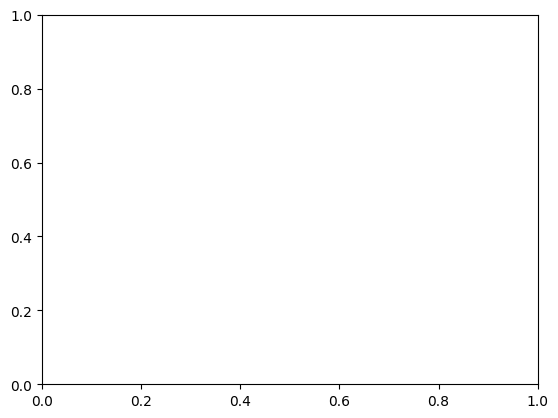

In [21]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(x_test)
print(y_pred)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Salary vs Experience (Test set)")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Индивидуальное задание
1.	Подберите набор данных на ресурсах [5-7] и согласуйте свой выбор с преподавателем. Студент может предложить набор данных в соответствии с тематикой магистерского исследования.
2.	Постройте модель регрессии.

Содержание отчета и его форма

Отчет по лабораторной работе должен содержать:
1.	Номер и название лабораторной работы; задачи лабораторной работы.
2.	Реализация каждого пункта подраздела «Индивидуальное задание» с приведением исходного кода программы, диаграмм и графиков для визуализации данных.
3.	Ответы на контрольные вопросы.
4.	Экранные формы (консольный вывод) и листинг программного кода с комментариями, показывающие порядок выполнения лабораторной работы, и результаты, полученные в ходе её выполнения.
Отчет о выполнении лабораторной работы сдается преподавателю.

Контрольные вопросы

1.	Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?
2.	Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?
3.	Что именно реализовано в методе fit(X, y) класса LinearRegression?  
4.	Что такое p-значение? Как p-значение используется при оптимизации моделей регрессии?
5.	Поясните назначение метода predict класса LinearRegression.
6.	Поясните назначение метода plot и scatter класса pyplot.
7.	По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?

Список литературы

Для выполнения лабораторной работы, при подготовке к защите, а также для ответа на контрольные вопросы рекомендуется использовать следующие
источники: [1, 2, 5-7].


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

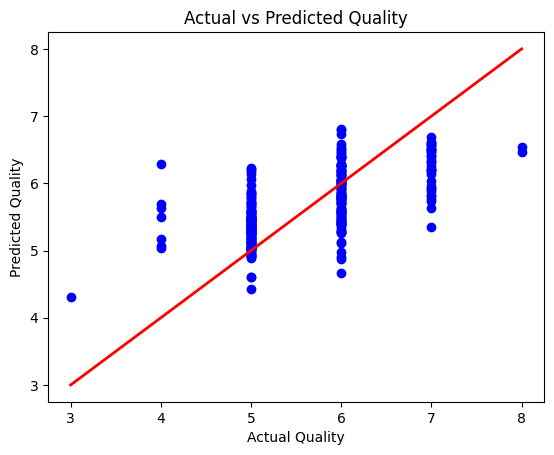

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Загрузка данных
dataset = pd.read_csv('WineQT.csv')

# 2. Изучение данных
print(dataset.head())
print(dataset.info())

# Предположим, что целевая переменная - это 'quality', а остальные колонки - признаки
X = dataset.drop(columns=['quality', 'Id']).values  # Все колонки, кроме 'quality' и 'Id'
y = dataset['quality'].values    # 'quality' как целевая переменная

# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 4. Обучение модели линейной регрессии
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 5. Предсказание результатов
y_pred = regressor.predict(X_test)

# 6. Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 7. Визуализация результатов
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Линия y=x
plt.title('Actual vs Predicted Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()
